In [531]:
import numpy as np
import matplotlib.pyplot as plt


In [712]:
# T_min = 18
# T_max = 37

# I = np.load("/home/vasily/Downloads/DCIM/MobIR/SourceVideo/big/VID_20250214_215738.mp4.i_t_phi.npy")
# I = np.load("/home/vasily/Downloads/DCIM/MobIR/SourceVideo/big/VID_20250214_215429.mp4.i_t_phi.npy")

T_min = 17
T_max = 40



I = np.load("/home/vasily/Downloads/DCIM/MobIR/SourceVideo/big/VID_20250214_214323.mp4.i_t_phi.npy")

image = I.T[:, 150:-130]

In [713]:
t = np.arange(I.shape[0]).astype(np.float32)/25

In [714]:
I = I*(T_max-T_min)+T_min

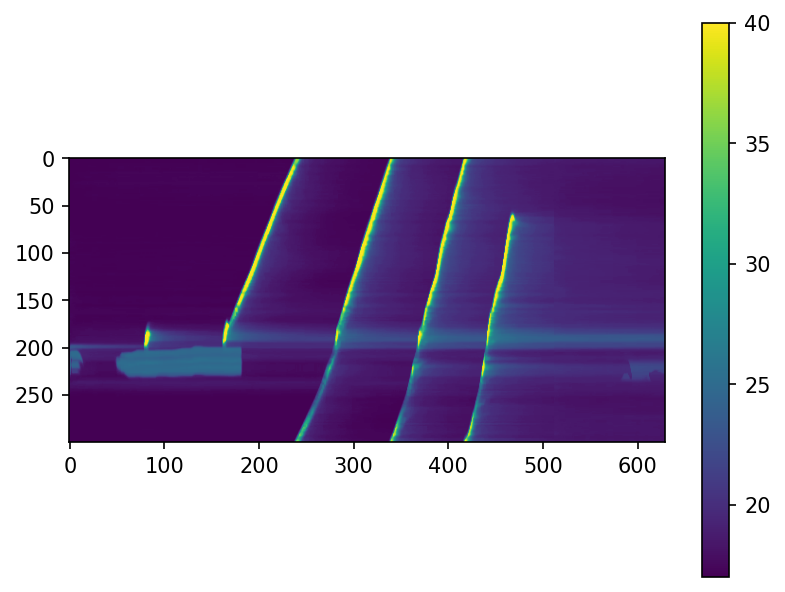

In [715]:
plt.imshow(I.T)
plt.colorbar()

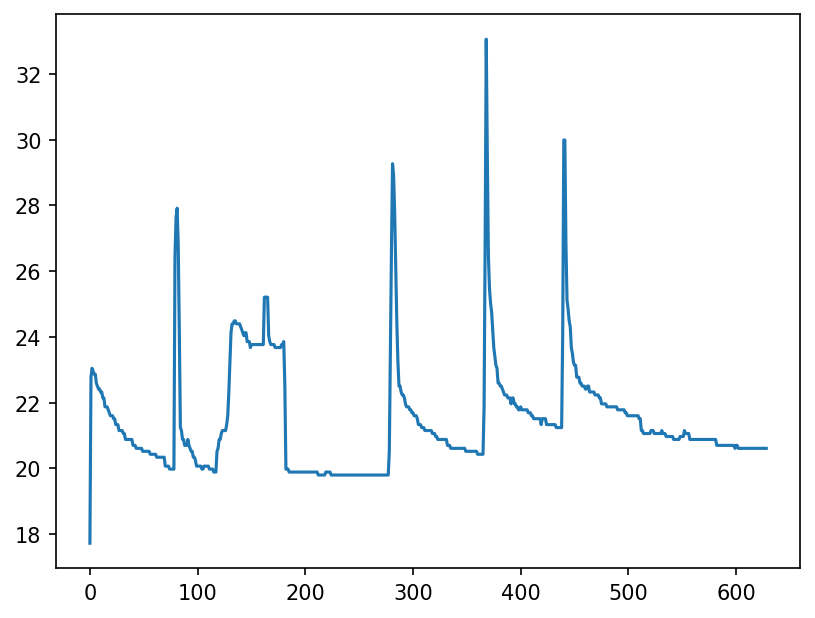

In [716]:
plt.plot(I.T[200])

/tmp/ipykernel_211446/759287425.py:1: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(I[3400:3700].T)


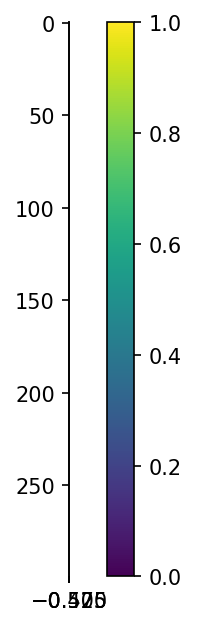

In [717]:
plt.imshow(I[3400:3700].T)
plt.colorbar()

In [718]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
from skimage.filters import prewitt_h, prewitt_v

# import matplotlib.pyplot as plt
from matplotlib import cm

In [719]:
# image = I[3400:3700].T
# image = I.T[:, 2300:2400]
t = np.arange(image.shape[1]).astype(np.float32)/25

In [720]:
import cv2

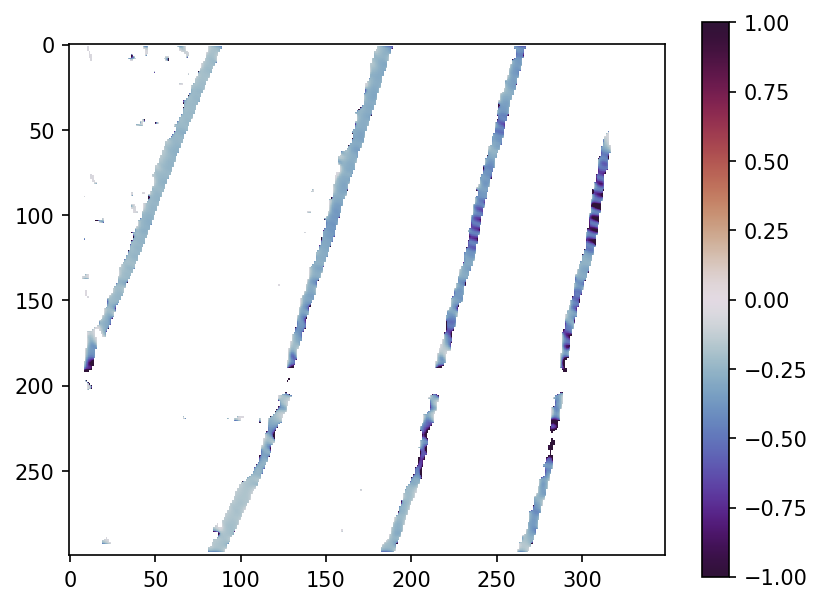

In [722]:
# angle = np.angle(prewitt_v(image) + prewitt_h(image)*1j)
v = prewitt_v(image)
h = prewitt_h(image)


v = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=11)

# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
h = cv2.Sobel(image,  cv2.CV_32F, 0, 1, ksize=11)

mag = np.sqrt(np.power(v, 2), np.power(h, 2))
angle_pupu = -np.arctan2(h, v) 
# angle = np.arctan2(v, h) -np.pi/2

angle = -np.arctan2(v, h) 
angle[mag < 0.1] = np.nan
angle[np.abs(angle_pupu) > 1.2] = np.nan
cvtx = (0.36 /2)* (2*np.pi/angle.shape[0])
cvtv = 25*cvtx
vel = np.clip(np.tan(angle)*cvtv, -4, 4)
vel[vel > 0] = np.nan
plt.imshow(vel, cmap="twilight_shifted",vmin=-1, vmax=1)
# plt.imshow(np.tan(angle)*25*np.pi*0.4 * (2*np.pi/angle.shape[0]), cmap="twilight_shifted",vmin=-0.3, vmax=0.3)
plt.colorbar()

In [723]:
# plt.plot(np.nanmean(vel[250:300], axis=0), 'o')

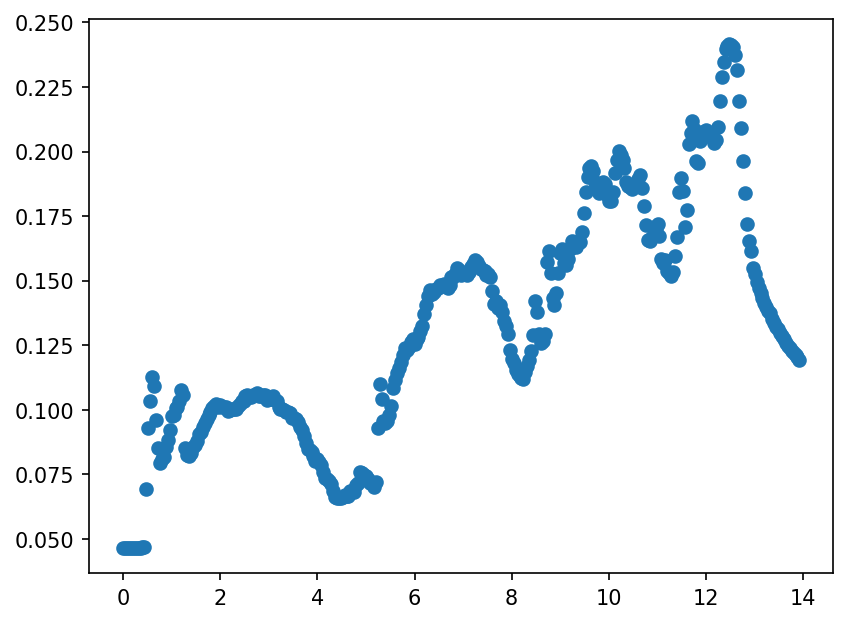

In [724]:
plt.scatter(t, np.nanmean(image.T, axis=1))

In [725]:
# plt.imshow(image.T[:, np.argmax(image.T, axis=1)])

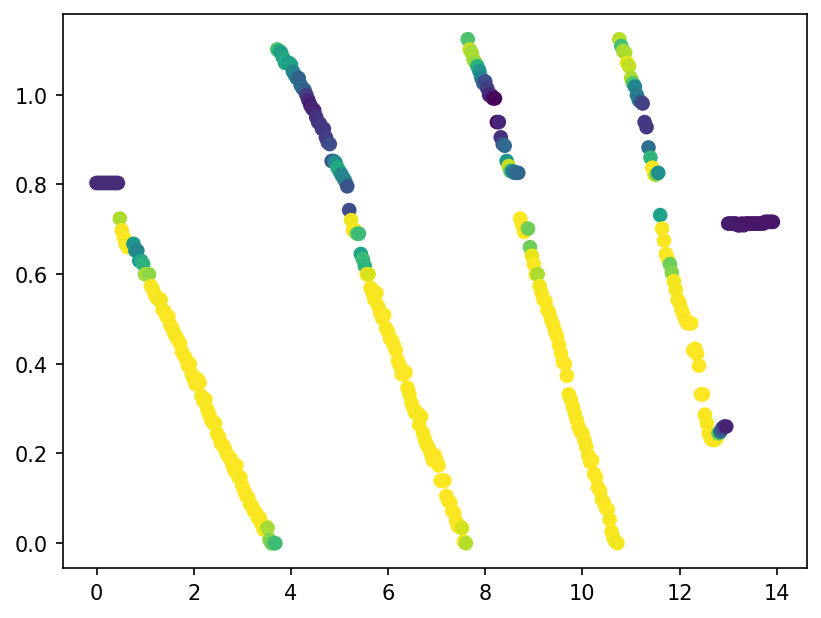

In [726]:
plt.scatter(t, np.argmax(image.T, axis=1)*cvtx, c=np.max(image.T, axis=1))


In [727]:
from scipy import stats


In [728]:
vel

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [729]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


/tmp/ipykernel_211446/2620838144.py:1: RuntimeWarning: Mean of empty slice
  vel_abs = np.abs(np.nanmean(np.abs(vel), axis=0))


Text(0, 0.5, 'v, м/c')

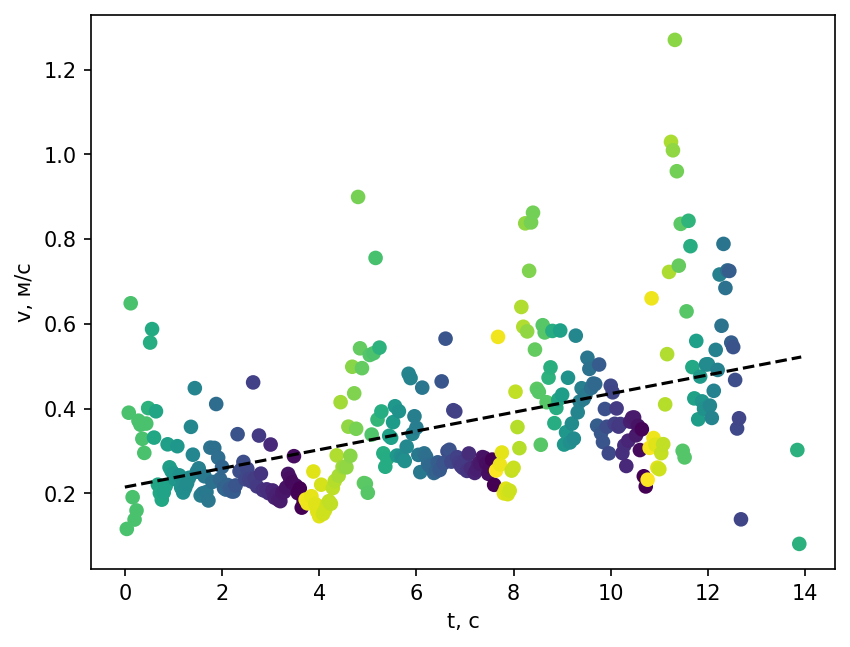

In [730]:

vel_abs = np.abs(np.nanmean(np.abs(vel), axis=0))


mask = ~np.isnan(vel_abs)

plt.scatter(t[mask], vel_abs[mask], c=np.argmax(image.T, axis=1)[mask]* np.pi*2/angle.shape[0])
# plt.colorbar()

slope, intercept, r_value, p_value, std_err = stats.linregress(t[mask],vel_abs[mask])
plt.plot(t, slope*t + intercept, "--",c="k")
plt.xlabel("t, с")
plt.ylabel("v, м/c")

In [633]:
slope

0.1092975028268969

/tmp/ipykernel_211446/3101783763.py:1: RuntimeWarning: Mean of empty slice
  plt.scatter(np.argmax(image.T, axis=1), np.abs(np.nanmean(vel, axis=0)), c=t)


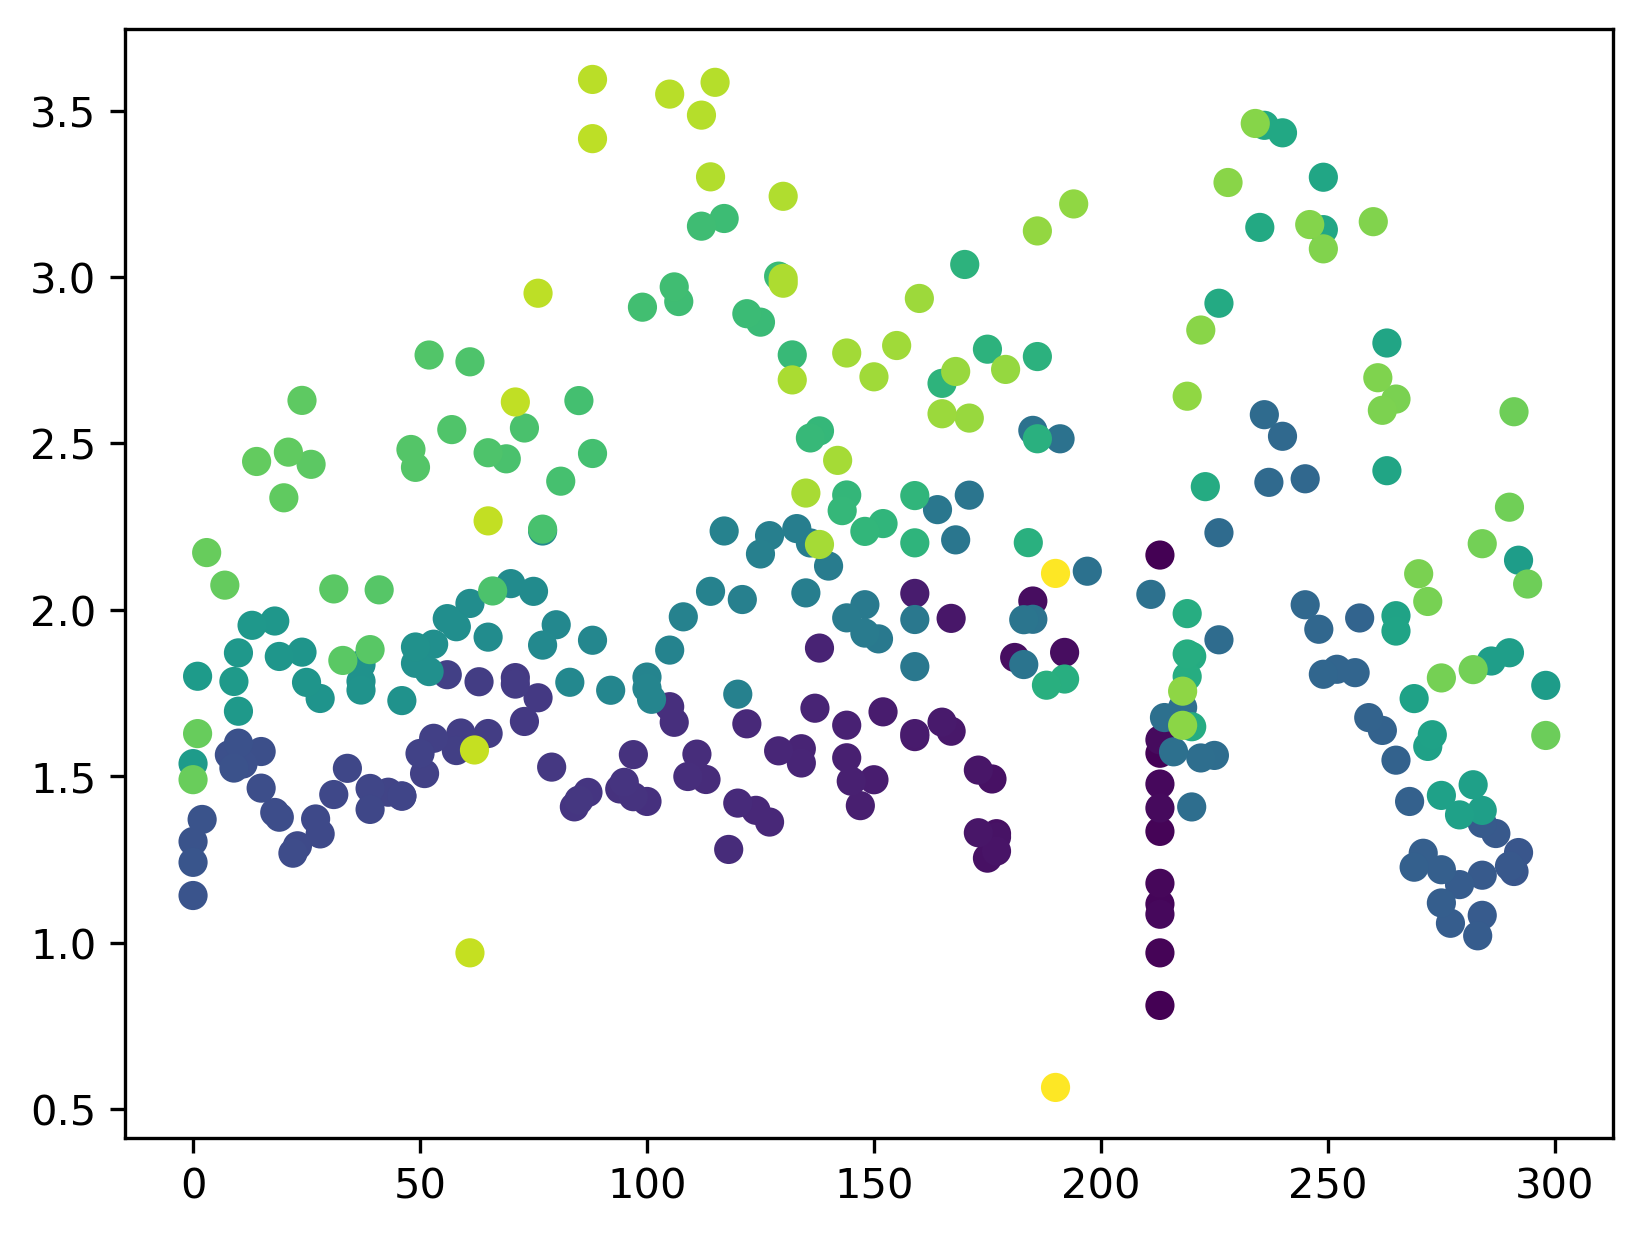

In [634]:
plt.scatter(np.argmax(image.T, axis=1), np.abs(np.nanmean(vel, axis=0)), c=t)

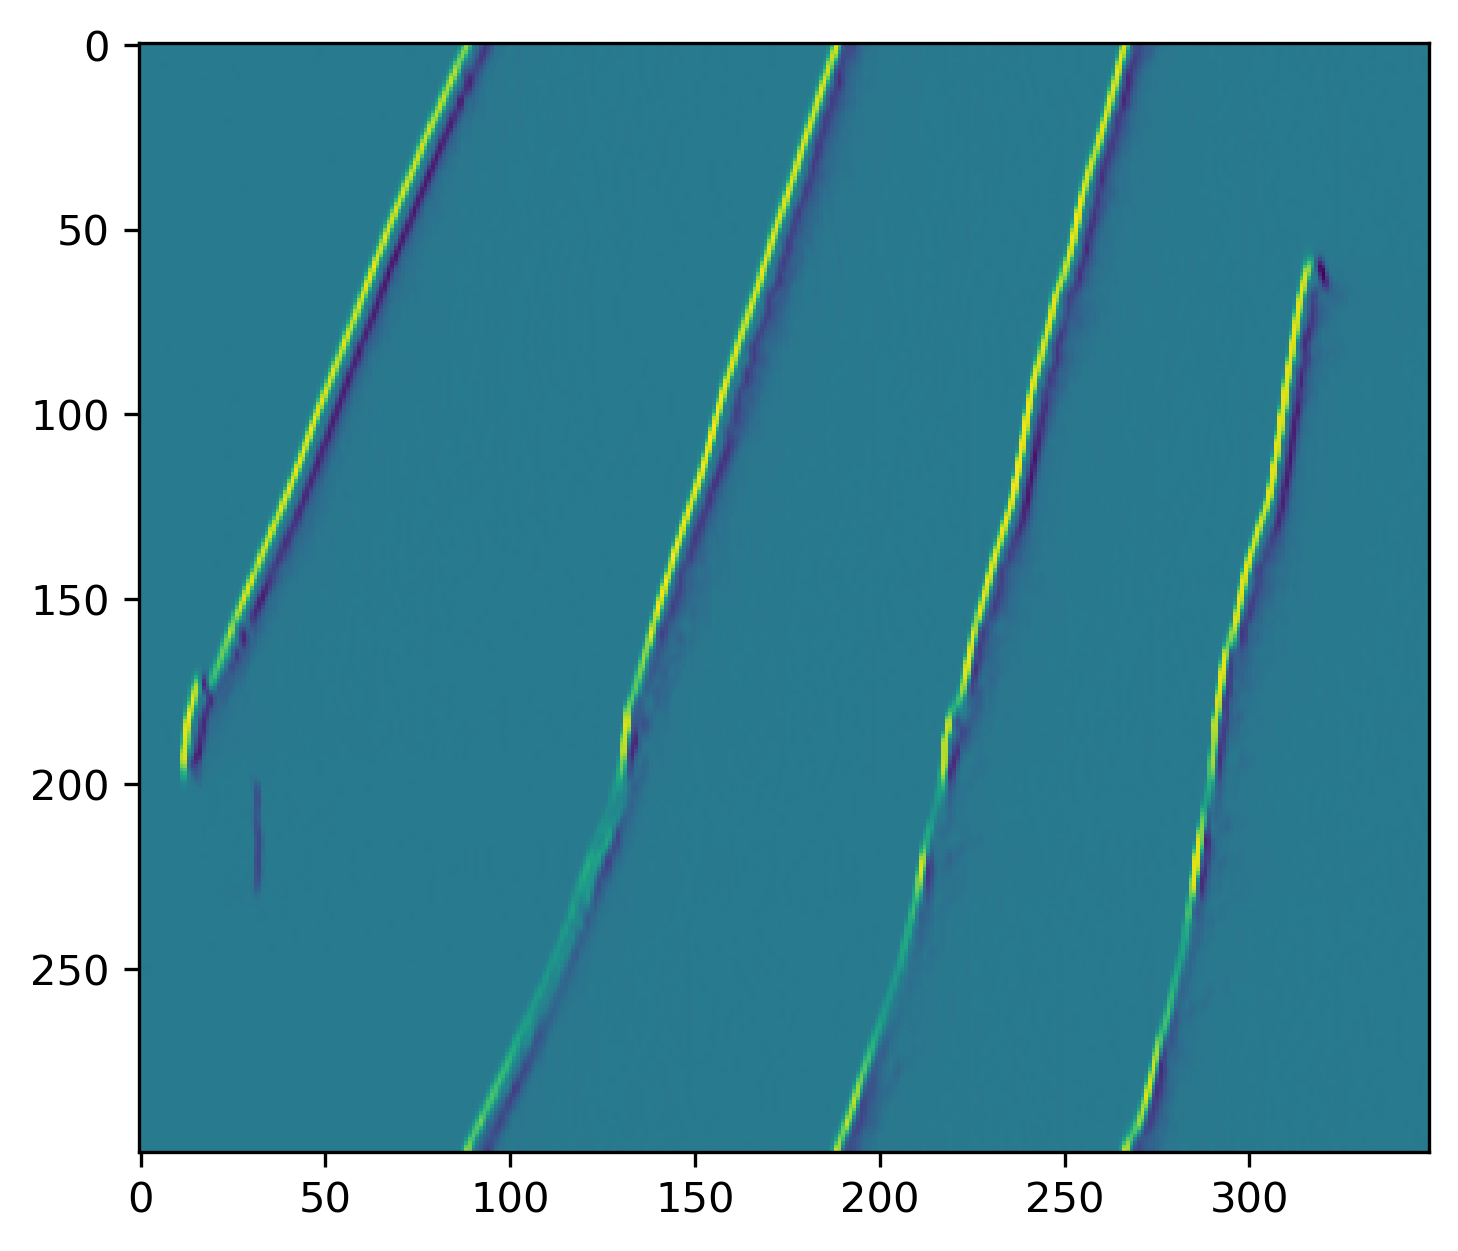

In [635]:
plt.imshow(prewitt_v(image))

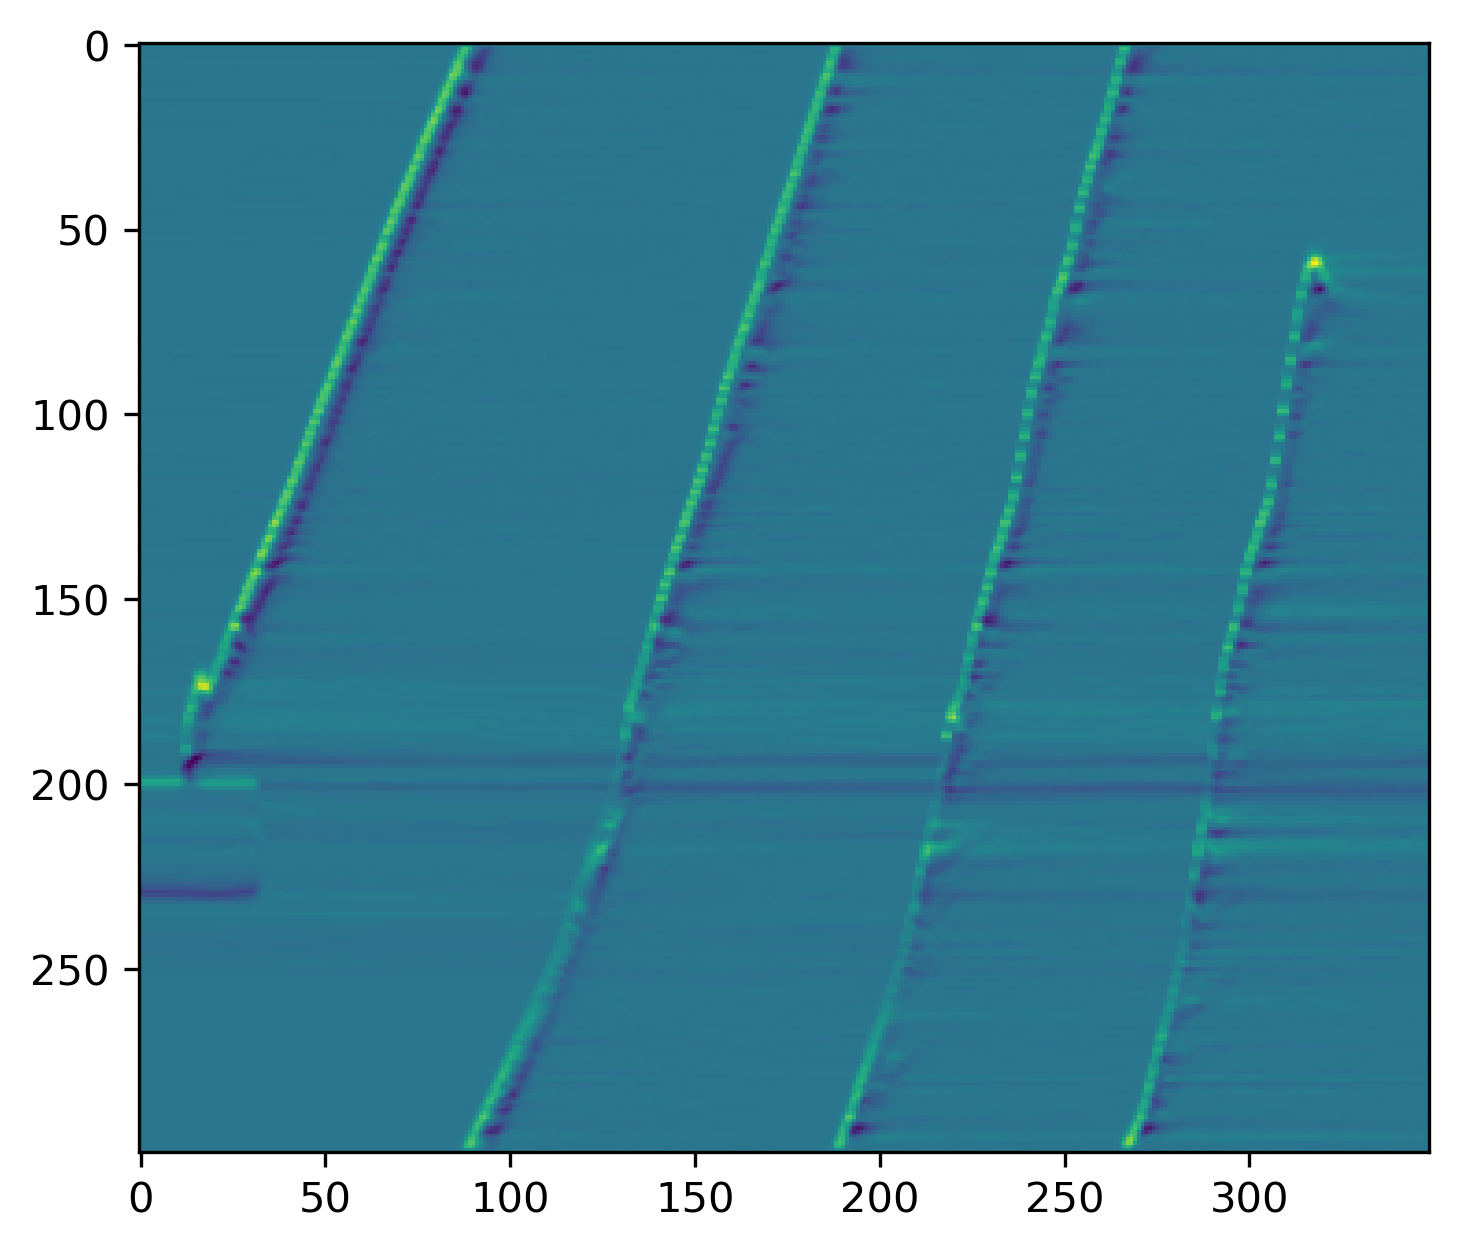

In [636]:
plt.imshow(prewitt_h(image))

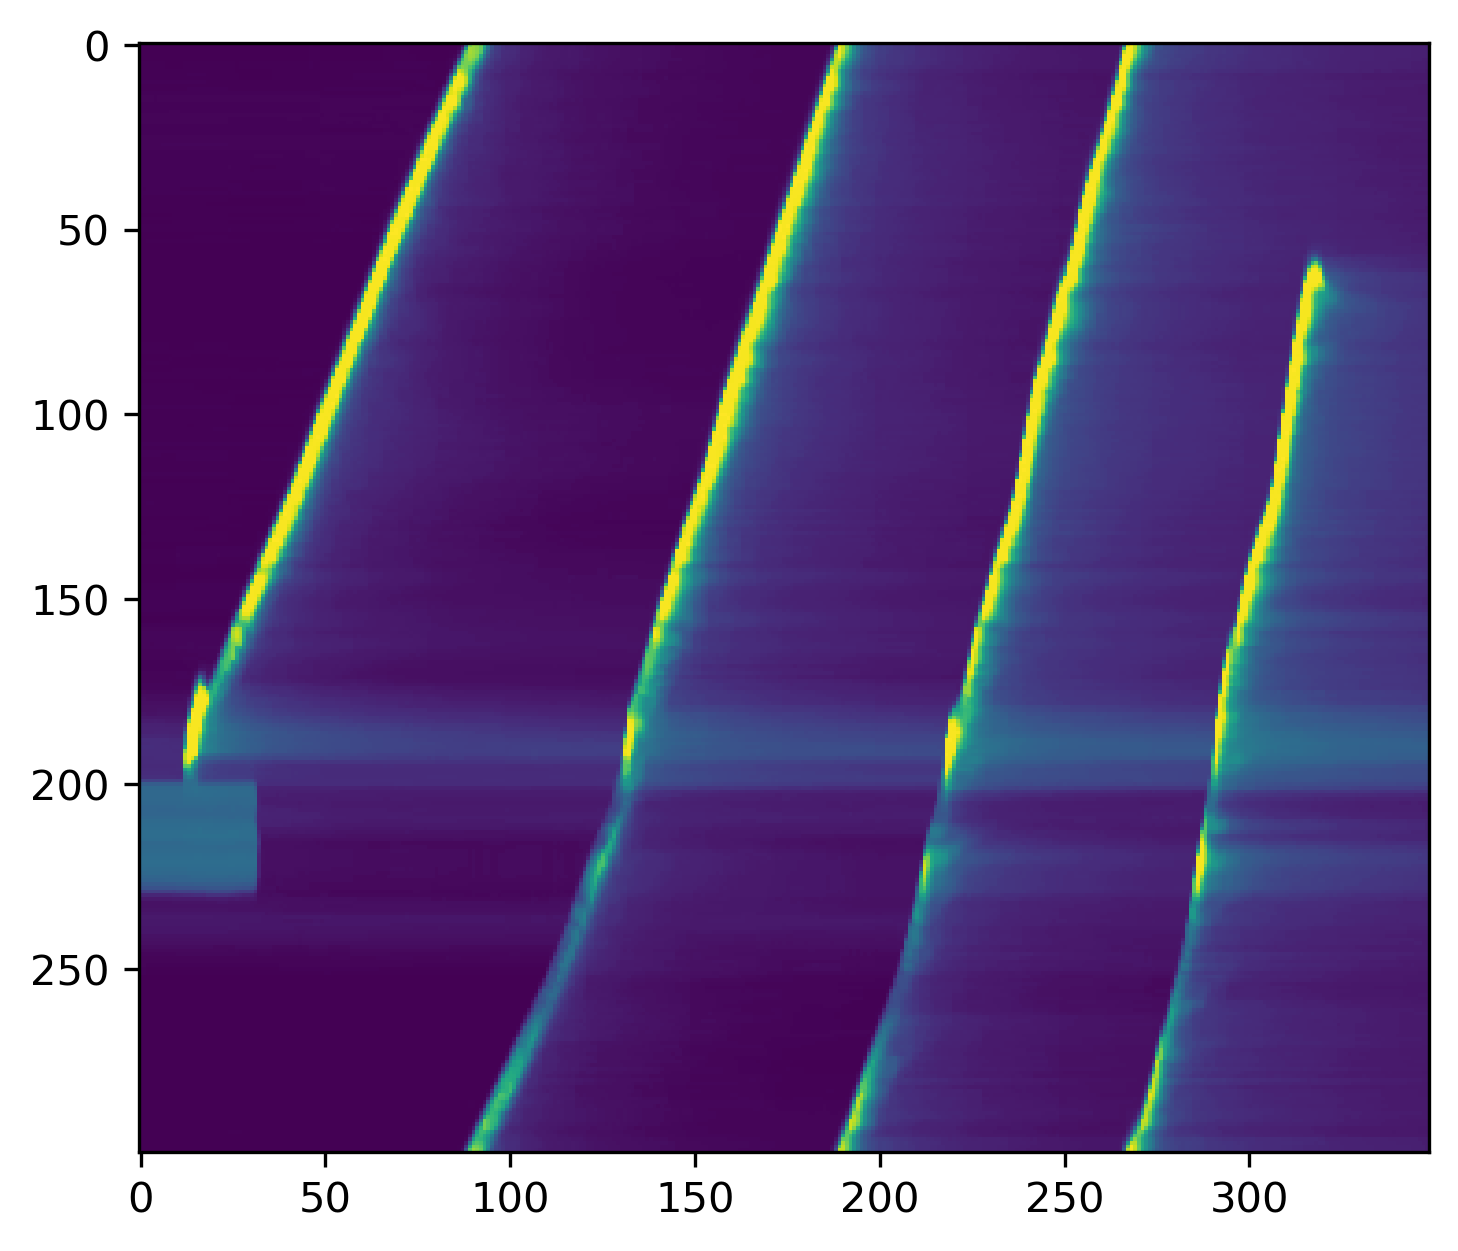

In [637]:
plt.imshow(image)

In [638]:
# tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 400, endpoint=False)
# h, theta, d = hough_line(image, theta=tested_angles)

In [639]:

# # Generating figure 1
# fig, axes = plt.subplots(1, 3, figsize=(15, 6))
# ax = axes.ravel()

# ax[0].imshow(image, cmap=cm.gray)
# ax[0].set_title('Input image')
# ax[0].set_axis_off()

# angle_step = 0.5 * np.diff(theta).mean()
# d_step = 0.5 * np.diff(d).mean()
# bounds = [
#     np.rad2deg(theta[0] - angle_step),
#     np.rad2deg(theta[-1] + angle_step),
#     d[-1] + d_step,
#     d[0] - d_step,
# ]
# ax[1].imshow(h, extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
# ax[1].set_title('Hough transform')
# ax[1].set_xlabel('Angles (degrees)')
# ax[1].set_ylabel('Distance (pixels)')
# ax[1].axis('image')

# ax[2].imshow(image, cmap=cm.gray)
# ax[2].set_ylim((image.shape[0], 0))
# ax[2].set_axis_off()
# ax[2].set_title('Detected lines')

# for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
#     (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
#     ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

# plt.tight_layout()
# plt.show()

In [640]:
def filter_by_range(t, I):
    mask = (I > (T_min+1)) & (I < (T_max-1))
    return t[mask], I[mask]

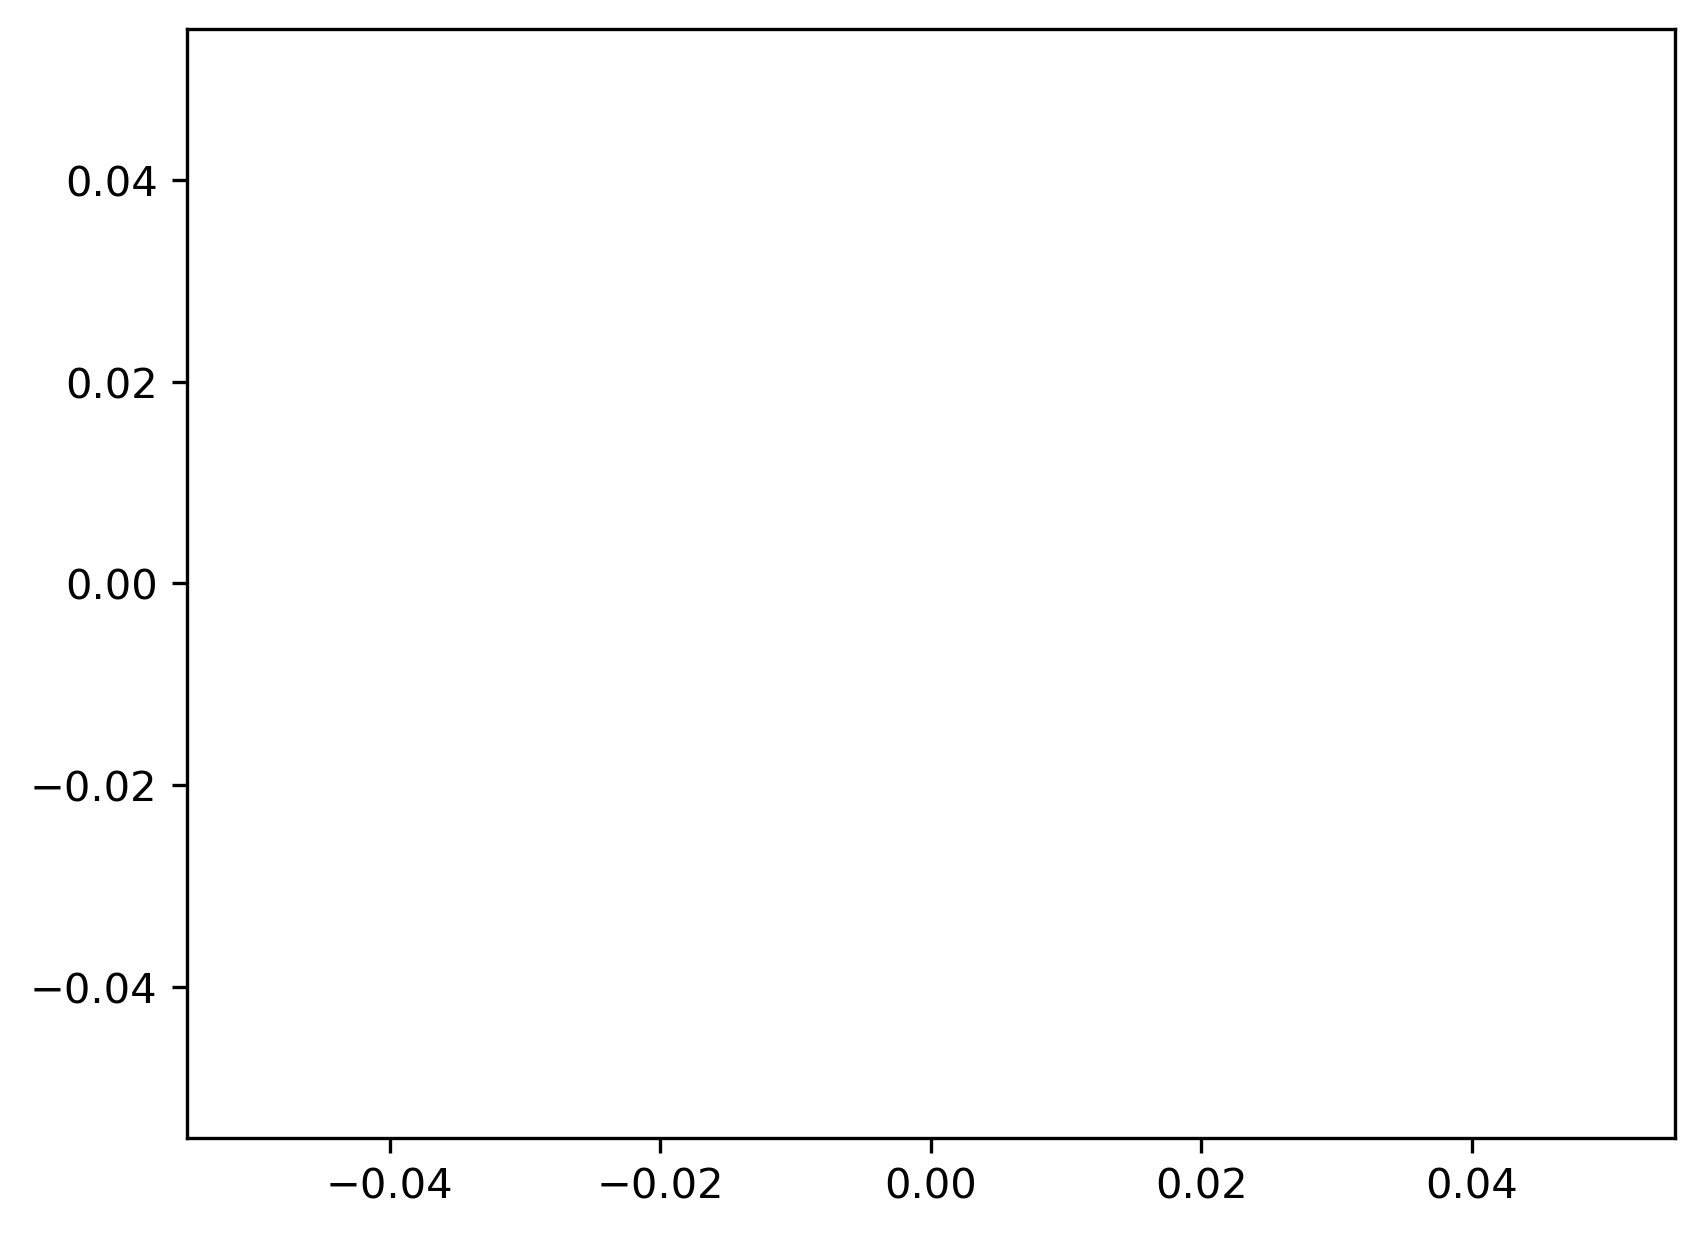

In [641]:
plt.plot(I[3400:3700, 50].T)
plt.plot(I[3400:3700, 100].T)
plt.plot(I[1200:1400, 50].T)



In [642]:
# (np.gradient(I[3400:3700, 50].T) < 0) & (I[3400:3700, 50].T > (T_max -1))

In [643]:
np.log(I[3400:3700, 60].T)

array([], dtype=float32)

ValueError: Inputs must not be empty.

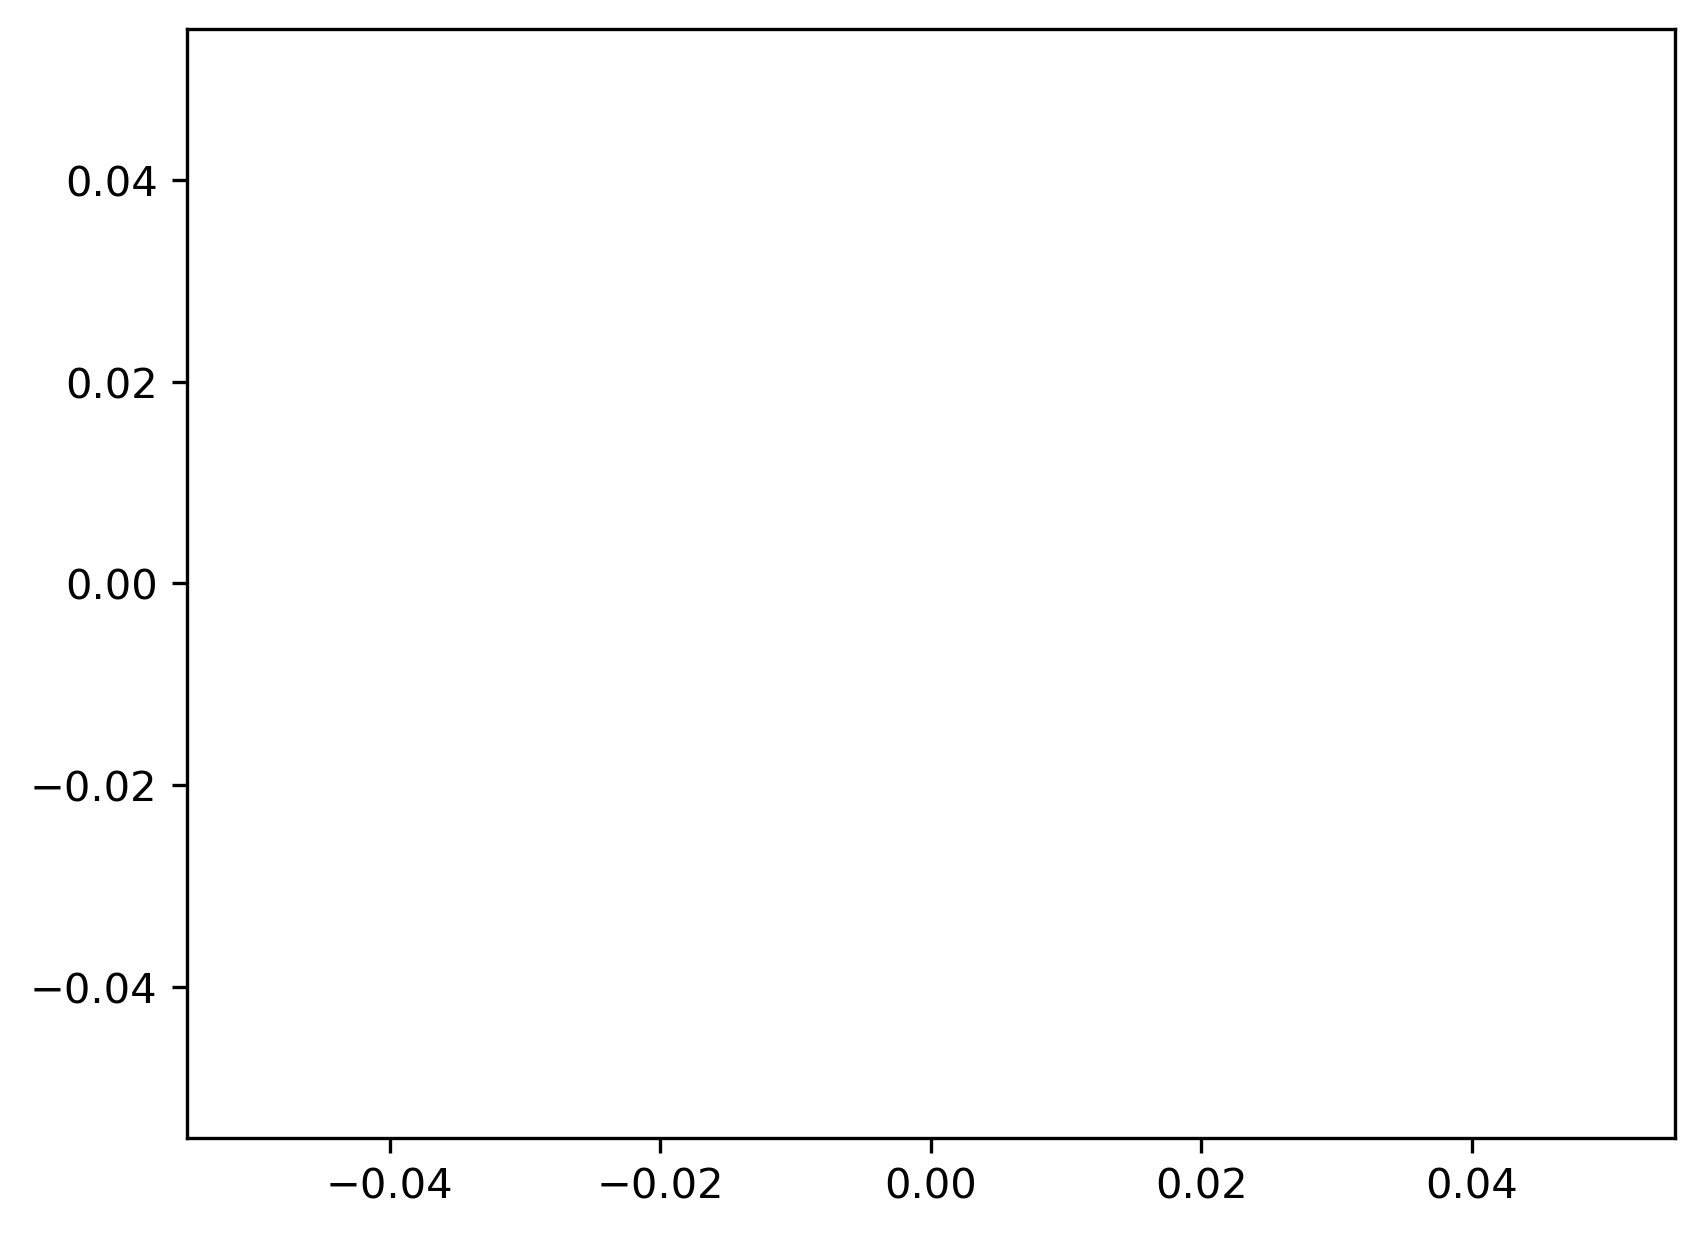

In [644]:
# for i in range(10, 200, 30):
t_, I_ = filter_by_range(t[1200:1400], I[1200:1400, 100].T)
plt.scatter(t_, np.log(I_-19))

slope, intercept, r_value, p_value, std_err = stats.linregress(t_,np.log(I_-19))

plt.plot(t_, intercept + slope*t_)

In [645]:
-1/slope

-9.149339867204278

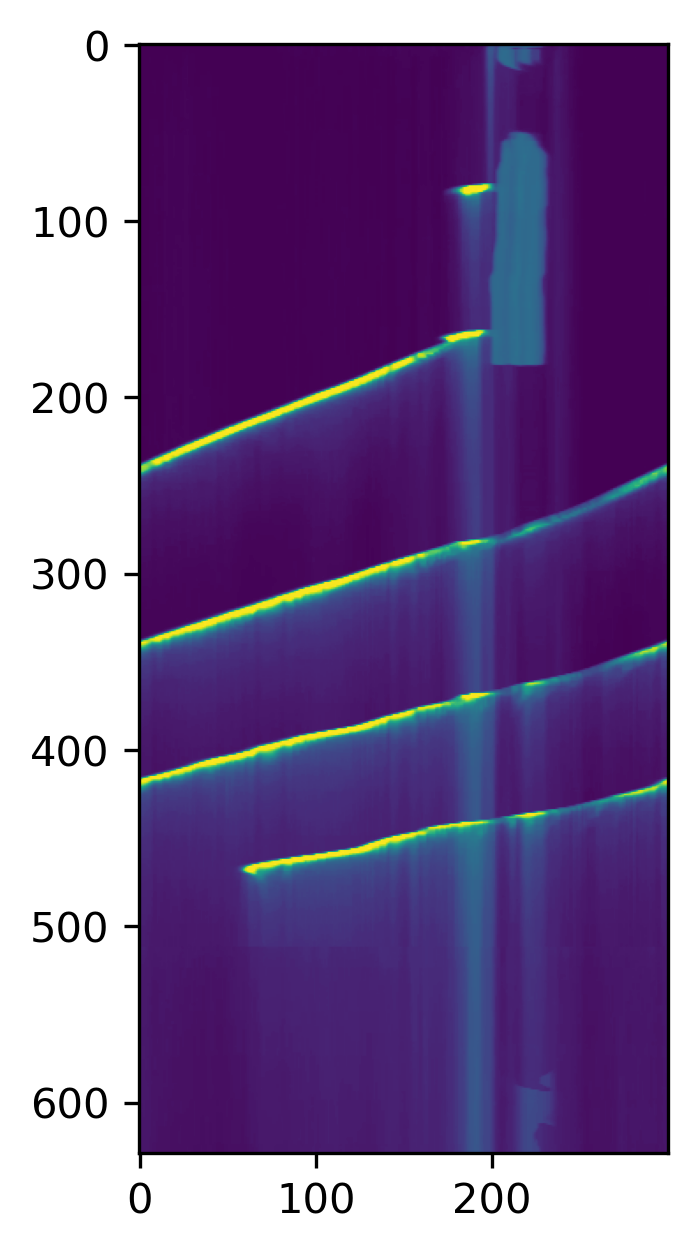

In [646]:
plt.imshow(I)